In [1]:
import numpy as np
import xarray as xr
import rfmtools
import matplotlib.pyplot as plt

In [2]:
heights = rfmtools.make_grid._get_height_array(dz=1000)

In [3]:
temp, h2o, pres = rfmtools.make_grid._get_temp_h2o_pres_from_height(height_array=heights, Ts=300, Tstrat=200)

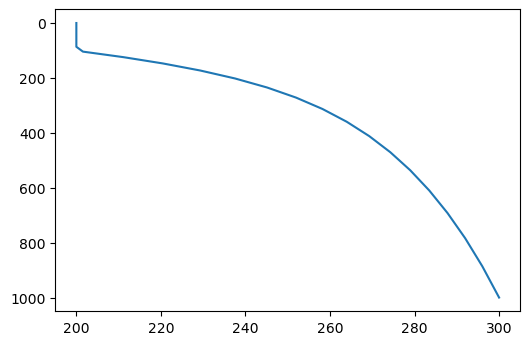

In [4]:
plt.figure(dpi=100)
plt.plot(temp, pres)
plt.gca().invert_yaxis()

In [5]:
rfmtools.make_input_files.generate_atm_file(fname='fulltest_dz1km.atm', height=heights/1000, temp=temp, h2o=h2o, pres=pres, co2=288)

In [6]:
rfmtools.make_input_files.make_driver(
    runtype='radiance',
    extra_flags=None,
    fname='rfm.drv', atmfile='fulltest_dz1km.atm', 
    SPC="0.1 1500 0.1",
    GAS="CO2",
    HIT=rfmtools.utils.RFM_DIR+"/hit/hitran_2016.bin",
    HDR=None,
    OUTDIR=None)

*HDR
*FLG
*SPC
*GAS
*ATM
*LEV
*HIT
*OUT


In [7]:
rfmtools.utils.RFM_DIR

'/gws/nopw/j04/aopp/andreww/side_projects/RFM'

In [8]:
da = rfmtools.run.run(drv_file=rfmtools.utils.RFM_DIR+"/src/rfm.drv")
da

Running RFM...
RFM run successful!


FileNotFoundError: [Errno 2] No such file or directory: '/gws/nopw/j04/aopp/andreww/side_projects/RFM/outp/tmp_161730047912566/*'

In [9]:
! ls -lh /gws/nopw/j04/aopp/andreww/side_projects/RFM/outp/tmp_161730047912566/

total 64K
-rw-r--r-- 1 andreww gws_aopp 250K Apr  1 19:09 rad_59000.asc


In [11]:
rfmtools.utils.read_spec("/gws/nopw/j04/aopp/andreww/side_projects/RFM/outp/tmp_161730047912566/*asc*")

FileNotFoundError: [Errno 2] No such file or directory: '/gws/nopw/j04/aopp/andreww/side_projects/RFM/outp/tmp_161730047912566/*asc*'

In [12]:
import os

In [14]:
os.path("/gws/nopw/j04/aopp/andreww/side_projects/RFM/outp/tmp_161730047912566/")

TypeError: 'module' object is not callable